In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [4]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Y     126 non-null int64
X1    126 non-null int64
X2    126 non-null int64
X3    126 non-null int64
X4    126 non-null int64
X5    126 non-null int64
X6    126 non-null int64
dtypes: int64(7)
memory usage: 7.0 KB


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


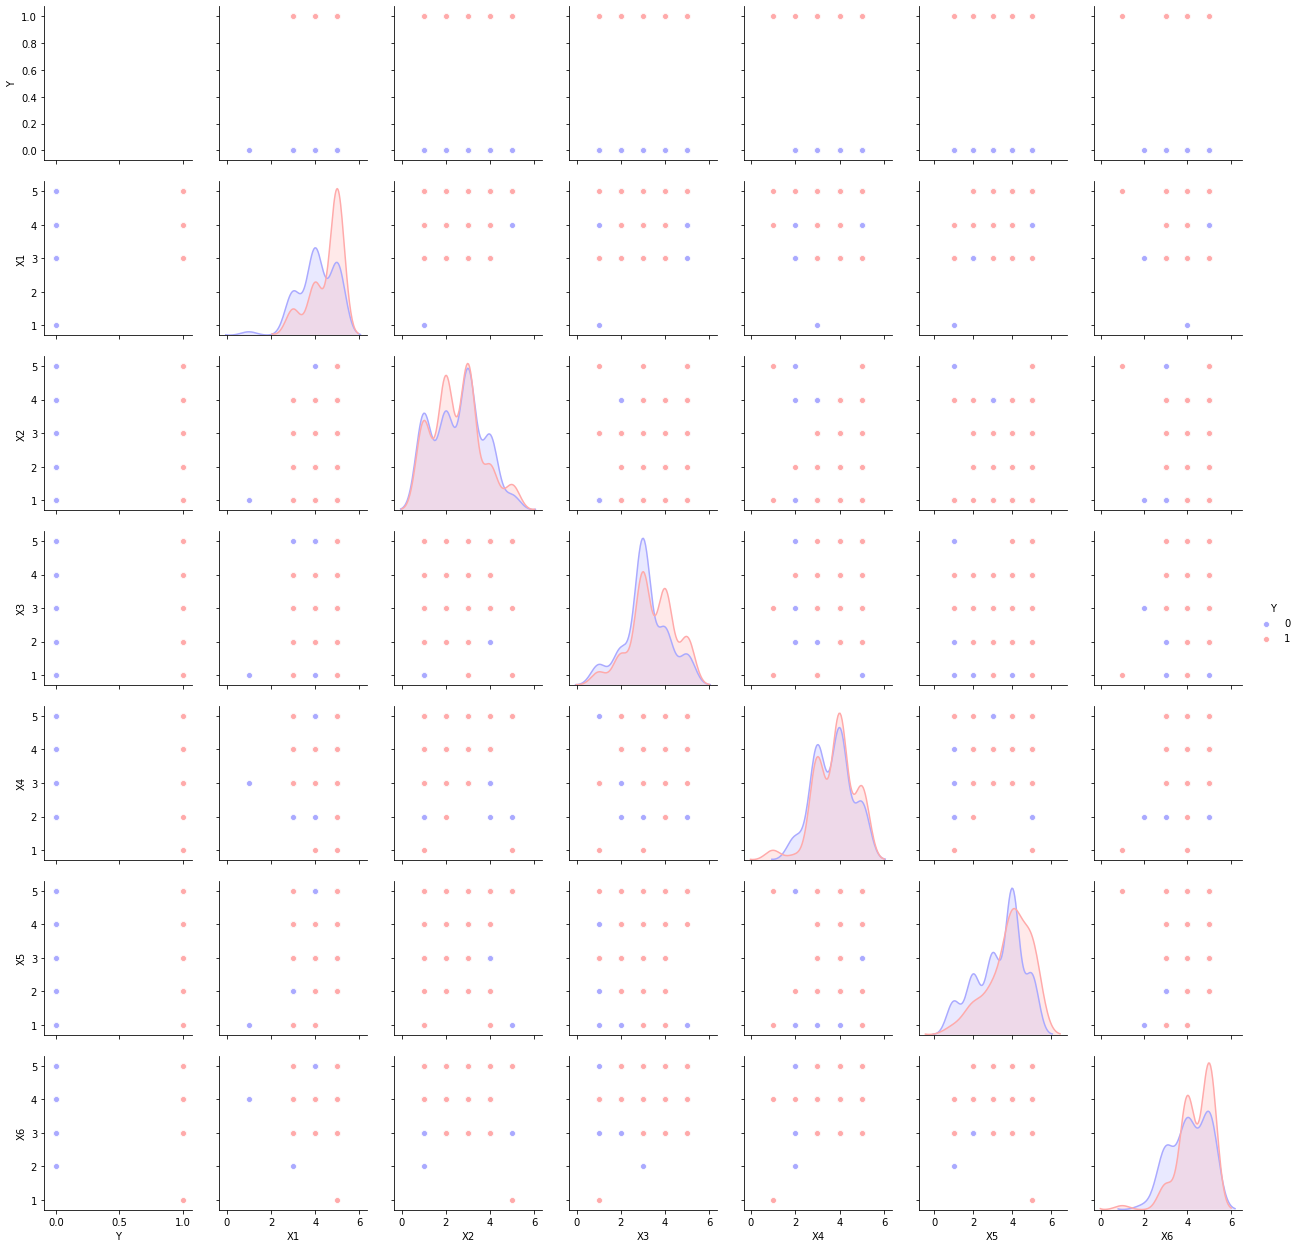

In [6]:
sns.pairplot(data, hue='Y', palette="bwr")

In [75]:
data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [76]:
data.dropna(how='any',inplace=True)

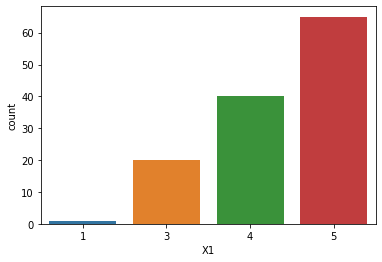

In [78]:
sns.countplot(x='X1',data=data)

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
y = data['Y']
X = data.drop(['Y'], axis=1)

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Random forest approach

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
rfc_pred = rfc.predict(X_test)

In [88]:
print(confusion_matrix(y_test,rfc_pred))

[[6 9]
 [2 9]]


In [89]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.75      0.40      0.52        15
           1       0.50      0.82      0.62        11

    accuracy                           0.58        26
   macro avg       0.62      0.61      0.57        26
weighted avg       0.64      0.58      0.56        26



## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn = KNeighborsClassifier(n_neighbors=2)

In [101]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [102]:
predictions = knn.predict(X_test)

In [103]:
print(confusion_matrix(y_test, predictions))

[[10  5]
 [ 4  7]]


In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.58      0.64      0.61        11

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.66        26



In [98]:
error_rate=[]

for i in range(1,40):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    pred_i = knn_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

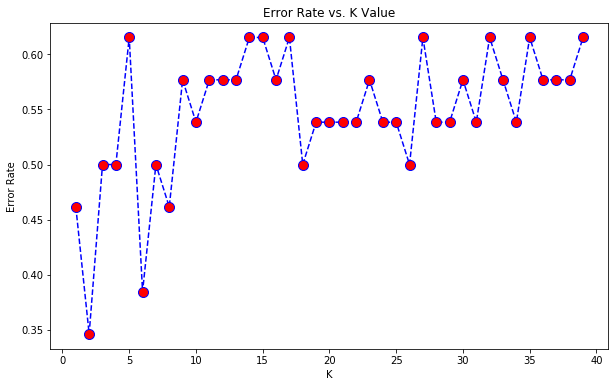

In [99]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## PCA Visualization

In [127]:
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = StandardScaler()
new_data = data.drop(['Y'], axis=1)
scaler.fit(new_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [193]:
scaled_data = scaler.transform(new_data)

In [194]:
from sklearn.decomposition import PCA

In [195]:
pca = PCA(n_components=2)

In [196]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [197]:
x_pca = pca.transform(scaled_data)

In [198]:
scaled_data.shape

(126, 7)

Text(0, 0.5, 'Second Principal Component')

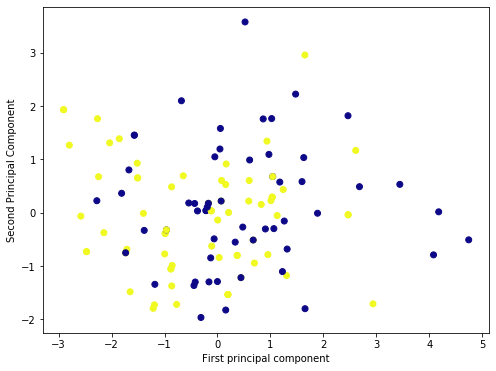

In [199]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['Y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [200]:
pca.components_

array([[-0.46727244, -0.1203438 , -0.44368484, -0.35866807, -0.50725474,
        -0.42938029, -0.        ],
       [-0.28358867,  0.73807312,  0.3166322 ,  0.32815824, -0.08454272,
        -0.39966772,  0.        ]])

## SVM with PCA data

In [201]:
X = x_pca
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [202]:
svm = SVC()

In [203]:
svm.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [204]:
predictions = svm.predict(X_test)

In [205]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 2 13]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.67      0.13      0.22        15
           1       0.43      0.91      0.59        11

    accuracy                           0.46        26
   macro avg       0.55      0.52      0.41        26
weighted avg       0.57      0.46      0.38        26

